In [1]:
# run in first lines for installing
!pip install yfinance
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

## Usando o pacote yfinance para capturar dados históricos

In [2]:
# Using yfinance to get Petrobras prices
petro = yf.Ticker("PETR4.SA")

# get historical market data
# hist = petro.history(period = "5y")

# other way is determining a period
hist = petro.history(start="2007-01-01", end="2022-11-03")


In [3]:
# get stock info: some of the features of yfinance
petro.info

{'address1': 'Avenida Henrique Valadares, 28',
 'city': 'Rio de Janeiro',
 'state': 'RJ',
 'zip': '20231-030',
 'country': 'Brazil',
 'phone': '55 21 3224 2401',
 'website': 'https://petrobras.com.br',
 'industry': 'Oil & Gas Integrated',
 'industryKey': 'oil-gas-integrated',
 'industryDisp': 'Oil & Gas Integrated',
 'sector': 'Energy',
 'sectorKey': 'energy',
 'sectorDisp': 'Energy',
 'longBusinessSummary': 'Petróleo Brasileiro S.A. - Petrobras explores, produces, and sells oil and gas in Brazil and internationally. It operates through three segments: Exploration and Production; Refining, Transportation & Marketing; and Gas & Low Carbon Energies. The Exploration and Production segment explores, develops, and produces crude oil, natural gas liquids, and natural gas primarily for supplies to the domestic refineries. The Refining, Transportation and Marketing segment engages in the refining, logistics, transport, acquisition, and export of crude oil; trading of oil products; and producti

In [4]:
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2007-01-02 00:00:00-02:00,6.481254,6.539585,6.450143,6.522734,10244800,0.225,0.0
2007-01-03 00:00:00-02:00,6.501992,6.533102,6.223298,6.324406,19898600,0.000,0.0
2007-01-04 00:00:00-02:00,6.286814,6.319221,6.144227,6.183115,21060200,0.000,0.0
2007-01-05 00:00:00-02:00,6.118303,6.220707,5.846090,5.995159,24864000,0.000,0.0
2007-01-08 00:00:00-02:00,6.027566,6.110526,5.936828,6.065157,19440200,0.000,0.0
...,...,...,...,...,...,...,...
2022-10-26 00:00:00-03:00,19.465428,20.020730,19.047459,19.531109,121334800,0.000,0.0
2022-10-27 00:00:00-03:00,19.590822,20.026704,19.507226,19.680386,111008800,0.000,0.0
2022-10-28 00:00:00-03:00,19.525141,19.775921,19.023578,19.447517,129745400,0.000,0.0


In [5]:
# creating log returns
log_prices = np.log(hist["Close"])
log_returns = log_prices.diff().dropna()

# another way without using first differences and log
log_returns2 = hist["Close"].pct_change().dropna()

In [6]:
log_prices

,Close
Date,
2007-01-02 00:00:00-02:00,1.875294
2007-01-03 00:00:00-02:00,1.844416
2007-01-04 00:00:00-02:00,1.821822
2007-01-05 00:00:00-02:00,1.790952
2007-01-08 00:00:00-02:00,1.802560
...,...
2022-10-26 00:00:00-03:00,2.972009
2022-10-27 00:00:00-03:00,2.979622
2022-10-28 00:00:00-03:00,2.967719


In [7]:
log_returns

,Close
Date,
2007-01-03 00:00:00-02:00,-0.030878
2007-01-04 00:00:00-02:00,-0.022594
2007-01-05 00:00:00-02:00,-0.030870
2007-01-08 00:00:00-02:00,0.011608
2007-01-09 00:00:00-02:00,-0.031039
...,...
2022-10-26 00:00:00-03:00,-0.024760
2022-10-27 00:00:00-03:00,0.007614
2022-10-28 00:00:00-03:00,-0.011903


In [8]:
log_returns2

,Close
Date,
2007-01-03 00:00:00-02:00,-0.030406
2007-01-04 00:00:00-02:00,-0.022341
2007-01-05 00:00:00-02:00,-0.030398
2007-01-08 00:00:00-02:00,0.011676
2007-01-09 00:00:00-02:00,-0.030562
...,...
2022-10-26 00:00:00-03:00,-0.024456
2022-10-27 00:00:00-03:00,0.007643
2022-10-28 00:00:00-03:00,-0.011833


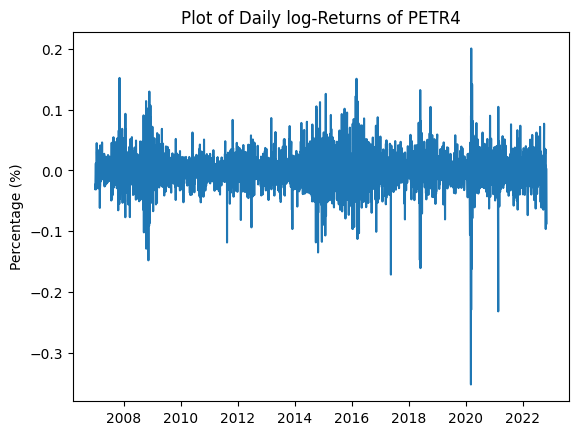

In [9]:
# ploting the log returns
plt.plot(log_returns);
plt.title("Plot of Daily log-Returns of PETR4");
plt.ylabel("Percentage (%)");

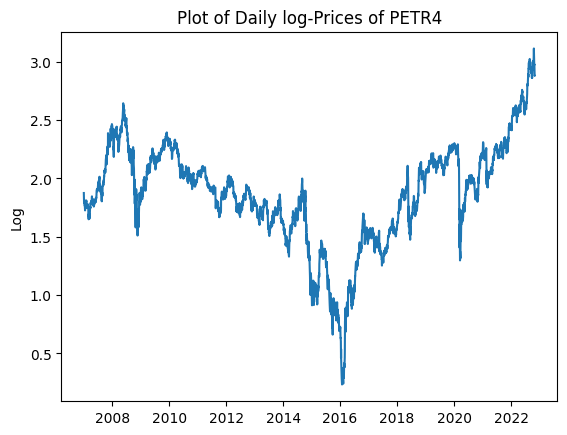

In [10]:
# ploting the prices
plt.plot(log_prices);
plt.title("Plot of Daily log-Prices of PETR4");
plt.ylabel("Log");

## Volatility modeling in Python
Vamos usar o pacote arch para estimar os modelos. Também podemos encontrar algumas postagens em que os modelos GARCH são estimados usando otimização (estilo solver), dado que são modelos determinísticos da volatilidade.
Para mais detalhes do pacote:
https://arch.readthedocs.io/en/latest/univariate/introduction.html


In [11]:
# analyzing the ACF of returns and quadratic returns
# !pip install statsmodels
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ADF test: unit root
adf = adfuller(log_prices)
print('ADF Statistic: {}'.format(adf[0]))
print('p-value: {}'.format(adf[1]))
print('Critical Values:')
for key, value in adf[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -1.62842494696922
p-value: 0.46831526608825136
Critical Values:
	1%: -3.432019708703093
	5%: -2.8622777859108606
	10%: -2.567162732014412


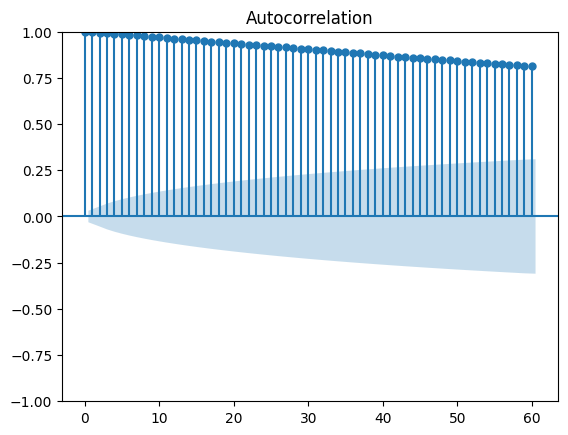

In [12]:
# ACF of log_prices
plot_acf(log_prices, lags=60);

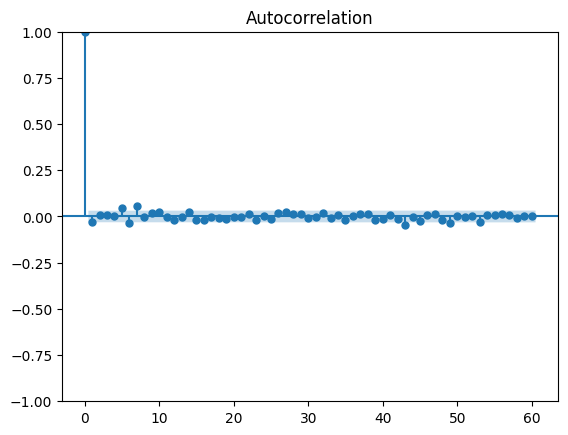

In [13]:
# ACF of log_returns
plot_acf(log_returns, lags=60);

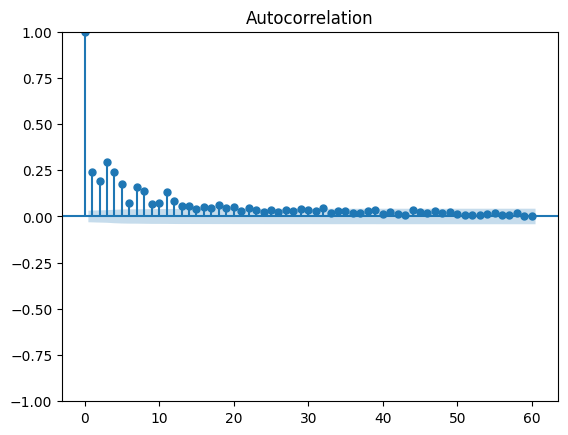

In [14]:
# ACF of quadratic returns: see the conditional homoscedasticity
plot_acf(log_returns**2, lags=60);

In [15]:
# run first line for installing the library
!pip install -q arch
from arch import arch_model


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 12.1 MB/s eta 0:00:00


In [16]:
# creating a ARCH(12) model with constant mean
garch = arch_model(log_returns, vol='ARCH', p=12, rescale=False).fit(disp='off')
print(garch.summary())

                      Constant Mean - ARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                8798.22
Distribution:                  Normal   AIC:                          -17568.4
Method:            Maximum Likelihood   BIC:                          -17480.6
                                        No. Observations:                 3926
Date:                Mon, May 26 2025   Df Residuals:                     3925
Time:                        20:16:52   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         8.0039e-04  3.917e-04      2.044  4.100e-02 [3.

In [17]:
# creating a GARCH(1,1) model with constant mean
garch = arch_model(log_returns, vol='GARCH', p=1, q=1, rescale=False).fit(disp='off')
print(garch.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                8804.70
Distribution:                  Normal   AIC:                          -17601.4
Method:            Maximum Likelihood   BIC:                          -17576.3
                                        No. Observations:                 3926
Date:                Mon, May 26 2025   Df Residuals:                     3925
Time:                        20:16:56   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         6.4826e-04  4.117e-04      1.574      0.115 

In [18]:
# creating a GARCH(1,1) model with AR(1) mean
garch = arch_model(log_returns,mean='ARX', lags=1, vol='GARCH', p=1, q=1, rescale=False).fit(disp='off')
print(garch.summary())

                           AR - GARCH Model Results                           
Dep. Variable:                  Close   R-squared:                       0.001
Mean Model:                        AR   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                8803.73
Distribution:                  Normal   AIC:                          -17597.5
Method:            Maximum Likelihood   BIC:                          -17566.1
                                        No. Observations:                 3925
Date:                Mon, May 26 2025   Df Residuals:                     3923
Time:                        20:16:58   Df Model:                            2
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
Const      6.6950e-04  4.151e-04      1.613      0.107 

In [19]:
# creating a GARCH(1,1) model zero mean
garch = arch_model(log_returns,mean='Zero', vol='GARCH', p=1, q=1, rescale=False, dist='StudentsT').fit(disp='off')
print(garch.summary())

                          Zero Mean - GARCH Model Results                           
Dep. Variable:                        Close   R-squared:                       0.000
Mean Model:                       Zero Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:                8969.36
Distribution:      Standardized Student's t   AIC:                          -17930.7
Method:                  Maximum Likelihood   BIC:                          -17905.6
                                              No. Observations:                 3926
Date:                      Mon, May 26 2025   Df Residuals:                     3926
Time:                              20:17:00   Df Model:                            0
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omeg

In [20]:
 # creating a GARCH(1,1) model with constant mean and t-Student errors
garch = arch_model(log_returns,
                   vol='GARCH',
                   power=1.0,
                   dist='StudentsT',
                   rescale='False').fit(disp='off')
print(garch.summary())

                       Constant Mean - AVGARCH Model Results                        
Dep. Variable:                        Close   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                          AVGARCH   Log-Likelihood:                8960.20
Distribution:      Standardized Student's t   AIC:                          -17910.4
Method:                  Maximum Likelihood   BIC:                          -17879.0
                                              No. Observations:                 3926
Date:                      Mon, May 26 2025   Df Residuals:                     3925
Time:                              20:17:02   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu  

In [21]:
 # creating a GARCH(1,1) model with constant mean, t-Student errors and asymmetric shocks (GJR-GARCH)
garch = arch_model(log_returns,
                   vol='GARCH',
                   p=1,
                   o=1,
                   q=1,
                   power=1.0,
                   dist='StudentsT',
                   rescale='False').fit(disp='off')
print(garch.summary())

                     Constant Mean - TARCH/ZARCH Model Results                      
Dep. Variable:                        Close   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      TARCH/ZARCH   Log-Likelihood:               -174551.
Distribution:      Standardized Student's t   AIC:                           349114.
Method:                  Maximum Likelihood   BIC:                           349152.
                                              No. Observations:                 3926
Date:                      Mon, May 26 2025   Df Residuals:                     3925
Time:                              20:17:05   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu  

## Forecasting volatility

https://arch.readthedocs.io/en/latest/univariate/forecasting.html


In [22]:
forecast = garch.forecast(horizon=1)
forecast.variance

,h.1
Date,
2022-11-01 00:00:00-03:00,2.236021e+14


## Value at Risk
https://arch.readthedocs.io/en/latest/univariate/univariate_volatility_forecasting.html#Parametric-VaR

In [23]:
am = arch_model(log_returns, vol="Garch", p=1, o=0, q=1, dist="skewt", rescale=False)
res = am.fit(last_obs="2021-12-31")
forecasts = res.forecast(start="2022-01-01", reindex=False)
cond_mean = forecasts.mean["2022":]
cond_var = forecasts.variance["2022":]
q = am.distribution.ppf([0.01, 0.05], res.params[-2:])
print(q)

Iteration:      1,   Func. Count:      8,   Neg. LLF: 390658.38455198176
Iteration:      2,   Func. Count:     25,   Neg. LLF: 2034024.2284916663
Iteration:      3,   Func. Count:     42,   Neg. LLF: 16498.978725178757
Iteration:      4,   Func. Count:     50,   Neg. LLF: 10573.706961983578
Iteration:      5,   Func. Count:     57,   Neg. LLF: 32414.19603278839
Iteration:      6,   Func. Count:     68,   Neg. LLF: 112992.94144688276
Iteration:      7,   Func. Count:     82,   Neg. LLF: 298402.49523688585
Iteration:      8,   Func. Count:     99,   Neg. LLF: 45317.94184255569
Iteration:      9,   Func. Count:    107,   Neg. LLF: 24093.969671964063
Iteration:     10,   Func. Count:    115,   Neg. LLF: 639752.9960794718
Iteration:     11,   Func. Count:    132,   Neg. LLF: 5296.4436541080495
Iteration:     12,   Func. Count:    139,   Neg. LLF: 1298916.2356498886
Iteration:     13,   Func. Count:    155,   Neg. LLF: 70671.20098488516
Iteration:     14,   Func. Count:    172,   Neg. LLF: 7

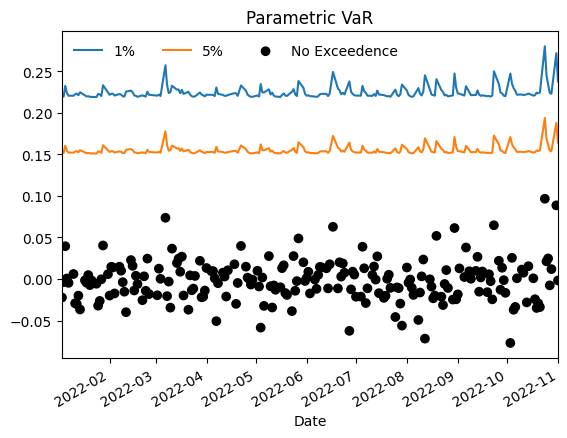

In [24]:
value_at_risk = -cond_mean.values - np.sqrt(cond_var).values * q[None, :]
value_at_risk = pd.DataFrame(value_at_risk, columns=["1%", "5%"], index=cond_var.index)
ax = value_at_risk.plot(legend=False)
xl = ax.set_xlim(value_at_risk.index[0], value_at_risk.index[-1])
rets_2022 = log_returns["2022":].copy()
rets_2022.name = "Log Return"
c = []
for idx in value_at_risk.index:
    if rets_2022[idx] > -value_at_risk.loc[idx, "5%"]:
        c.append("#000000")
    elif rets_2022[idx] < -value_at_risk.loc[idx, "1%"]:
        c.append("#BB0000")
    else:
        c.append("#BB00BB")
c = np.array(c, dtype="object")
labels = {
    "#BB0000": "1% Exceedence",
    "#BB00BB": "5% Exceedence",
    "#000000": "No Exceedence",
}
markers = {"#BB0000": "x", "#BB00BB": "s", "#000000": "o"}
for color in np.unique(c):
    sel = c == color
    ax.scatter(
        rets_2022.index[sel],
        -rets_2022.loc[sel],
        marker=markers[color],
        c=c[sel],
        label=labels[color],
    )
ax.set_title("Parametric VaR")
leg = ax.legend(frameon=False, ncol=3)
